In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# READING DATA

In [2]:
fast_tag = pd.read_csv('FastagFraudDetection.csv')
fast_tag

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


In [3]:
fast_tag.shape

(5000, 13)

In [4]:
type(fast_tag)

pandas.core.frame.DataFrame

In [5]:
fast_tag.dtypes

Transaction_ID            int64
Timestamp                object
Vehicle_Type             object
FastagID                 object
TollBoothID              object
Lane_Type                object
Vehicle_Dimensions       object
Transaction_Amount        int64
Amount_paid               int64
Geographical_Location    object
Vehicle_Speed             int64
Vehicle_Plate_Number     object
Fraud_indicator          object
dtype: object

# MISSING VALUES

In [7]:
fast_tag.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [8]:
fast_tag = fast_tag.dropna(how = 'any')
fast_tag.isnull().sum()


Transaction_ID           0
Timestamp                0
Vehicle_Type             0
FastagID                 0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
dtype: int64

In [9]:
fast_tag.duplicated().sum()

0

In [10]:
display(fast_tag.drop_duplicates())

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
5,6,1/11/2023 10:00,Sedan,FTG-066-GHI-987,A-101,Regular,Medium,160,100,"13.059816123454882, 77.77068662374292",105,KA77KL0123,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


In [11]:
fast_tag.nunique()

Transaction_ID           4451
Timestamp                4008
Vehicle_Type                7
FastagID                 4451
TollBoothID                 4
Lane_Type                   2
Vehicle_Dimensions          3
Transaction_Amount         20
Amount_paid                23
Geographical_Location       5
Vehicle_Speed              85
Vehicle_Plate_Number     4451
Fraud_indicator             2
dtype: int64

In [12]:
fast_tag.TollBoothID.unique()

array(['A-101', 'B-102', 'C-103', 'D-106'], dtype=object)

In [13]:
fast_tag.TollBoothID.replace({'A-101':1,'B-102':2,'D-104':3,'C-103':4,'D-105':5,'D-106':6},inplace=True)

C:\Users\agraw\AppData\Local\Temp\ipykernel_1772\2105696536.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fast_tag.TollBoothID.replace({'A-101':1,'B-102':2,'D-104':3,'C-103':4,'D-105':5,'D-106':6},inplace=True)
C:\Users\agraw\AppData\Local\Temp\ipykernel_1772\2105696536.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_s

In [14]:
fast_tag.TollBoothID.unique()

array([1, 2, 4, 6], dtype=int64)

In [15]:
fast_tag.Fraud_indicator  .unique()

array(['Fraud', 'Not Fraud'], dtype=object)

In [16]:
fast_tag.Fraud_indicator.replace({'Fraud':0,'Not Fraud':1},inplace=True)
fast_tag.Fraud_indicator.unique()

C:\Users\agraw\AppData\Local\Temp\ipykernel_1772\208331335.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fast_tag.Fraud_indicator.replace({'Fraud':0,'Not Fraud':1},inplace=True)
C:\Users\agraw\AppData\Local\Temp\ipykernel_1772\208331335.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fast_

array([0, 1], dtype=int64)

In [17]:
fast_tag.dropna(subset=['FastagID'], inplace=True)

C:\Users\agraw\AppData\Local\Temp\ipykernel_1772\3394297946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fast_tag.dropna(subset=['FastagID'], inplace=True)


In [18]:
fast_tag.Vehicle_Type.unique()


array(['Bus ', 'Car', 'Truck', 'Van', 'Sedan', 'SUV', 'Motorcycle'],
      dtype=object)

In [19]:
fast_tag.Vehicle_Type.replace({'Bus ':1,'Car':2,'Truck':3,'Van':4,'Sedan':5,'SUV':6,'Motorcycle':7},inplace=True)

C:\Users\agraw\AppData\Local\Temp\ipykernel_1772\3163891693.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fast_tag.Vehicle_Type.replace({'Bus ':1,'Car':2,'Truck':3,'Van':4,'Sedan':5,'SUV':6,'Motorcycle':7},inplace=True)
C:\Users\agraw\AppData\Local\Temp\ipykernel_1772\3163891693.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('fu

In [20]:
fast_tag.Vehicle_Type .unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [23]:
column = fast_tag.select_dtypes(include=['object'])
column

,Timestamp,FastagID,Lane_Type,Vehicle_Dimensions,Geographical_Location,Vehicle_Plate_Number
0,1/6/2023 11:20,FTG-001-ABC-121,Express,Large,"13.059816123454882, 77.77068662374292",KA11AB1234
1,1/7/2023 14:55,FTG-002-XYZ-451,Regular,Small,"13.059816123454882, 77.77068662374292",KA66CD5678
3,1/9/2023 2:05,FTG-044-LMN-322,Regular,Large,"13.059816123454882, 77.77068662374292",KA11GH3456
4,1/10/2023 6:35,FTG-505-DEF-652,Express,Medium,"13.059816123454882, 77.77068662374292",KA44IJ6789
5,1/11/2023 10:00,FTG-066-GHI-987,Regular,Medium,"13.059816123454882, 77.77068662374292",KA77KL0123
...,...,...,...,...,...,...
4995,1/1/2023 22:18,FTG-445-EDC-765,Regular,Large,"13.21331620748757, 77.55413526894684",KA74ST0123
4996,1/17/2023 13:43,FTG-446-LMK-432,Express,Medium,"13.21331620748757, 77.55413526894684",KA38UV3456
4997,2/5/2023 5:08,FTG-447-PLN-109,Regular,Medium,"13.21331620748757, 77.55413526894684",KA33WX6789
4998,2/20/2023 20:34,FTG-458-VFR-876,Express,Large,"13.21331620748757, 77.55413526894684",KA35YZ0123


In [24]:
for i in column.columns:
    try:
        df[i] = label_encoder.fit_transform(fast_tag[i])
    except:
        continue

['1/6/2023 11:20' '1/7/2023 14:55' '1/9/2023 2:05' ... '2/5/2023 5:08'
 '2/20/2023 20:34' '3/10/2023 0:59']


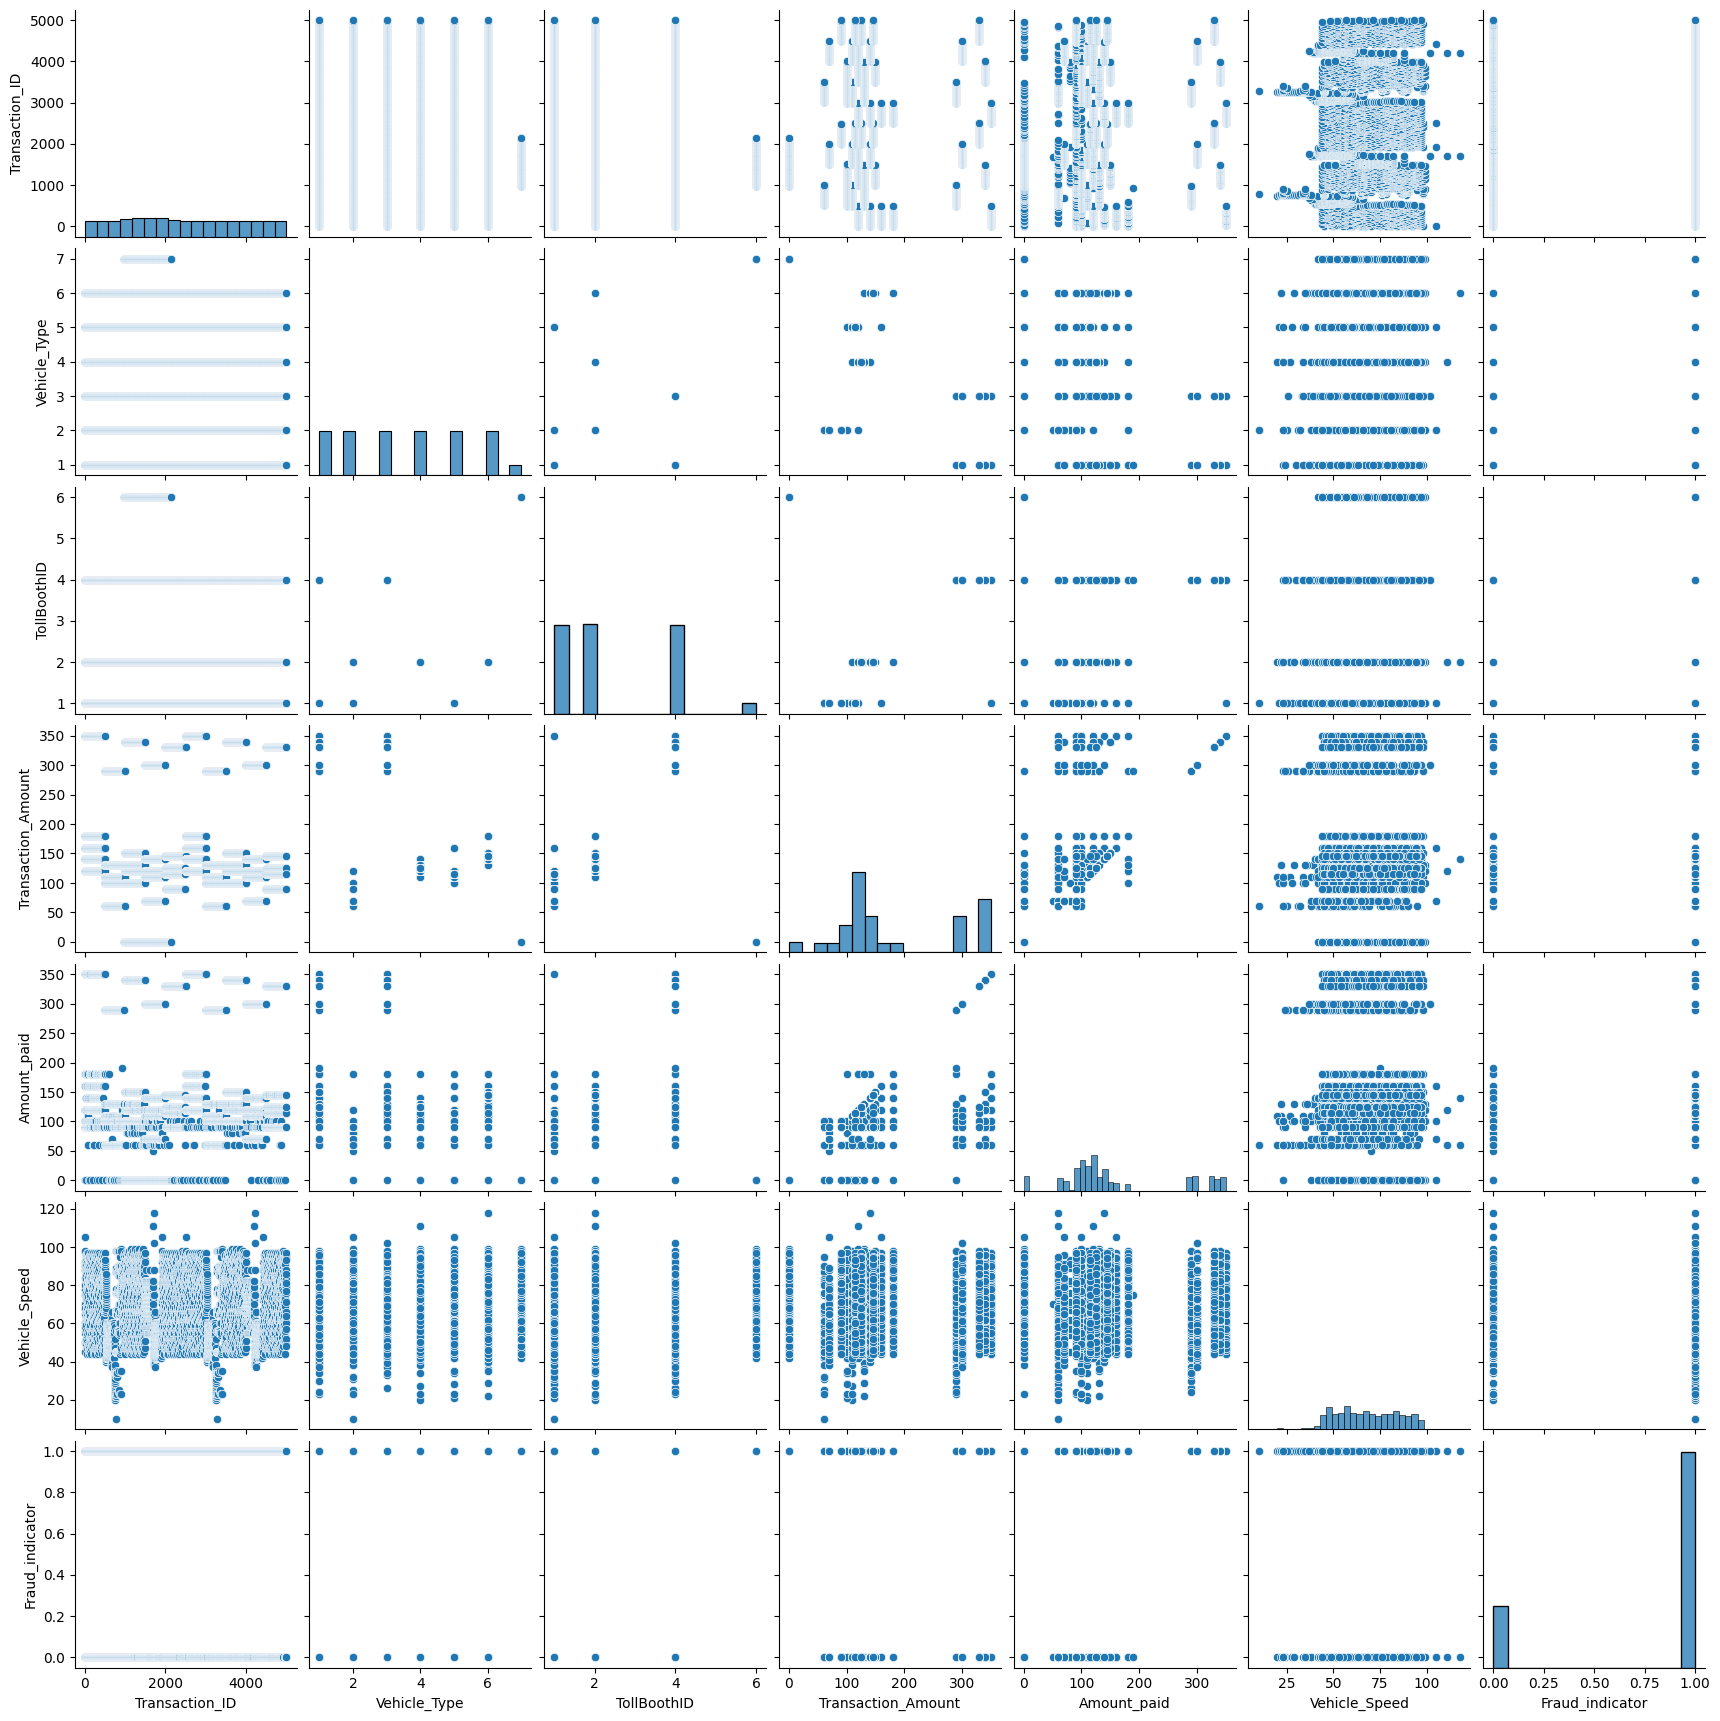

['FTG-001-ABC-121' 'FTG-002-XYZ-451' 'FTG-044-LMN-322' ...
 'FTG-447-PLN-109' 'FTG-458-VFR-876' 'FTG-459-WSX-543']


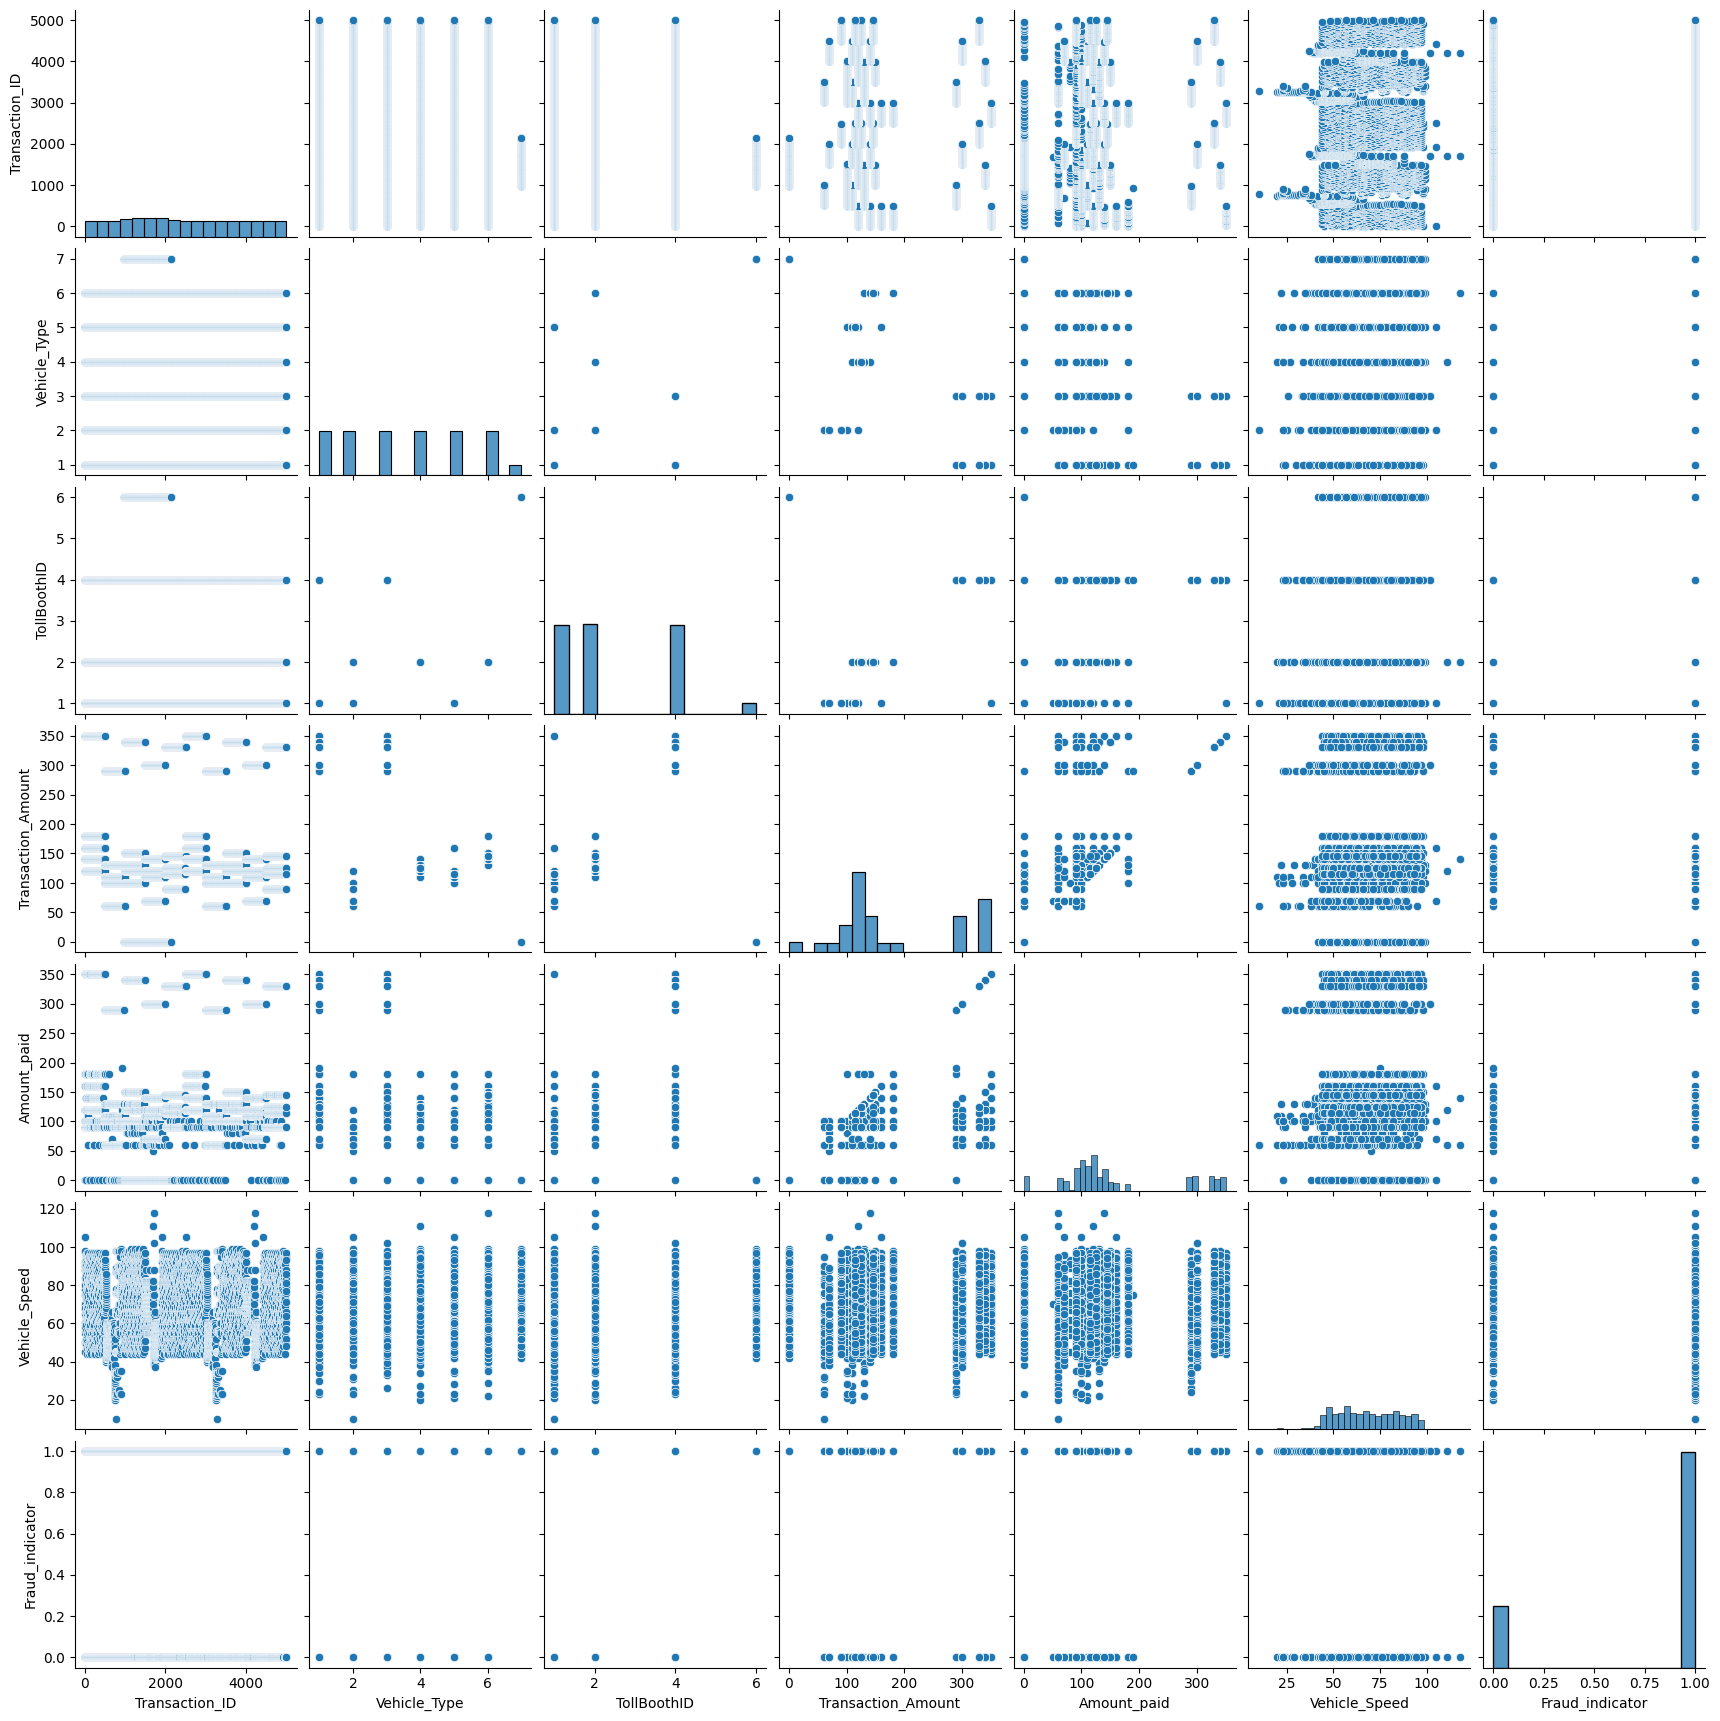

['Express' 'Regular']


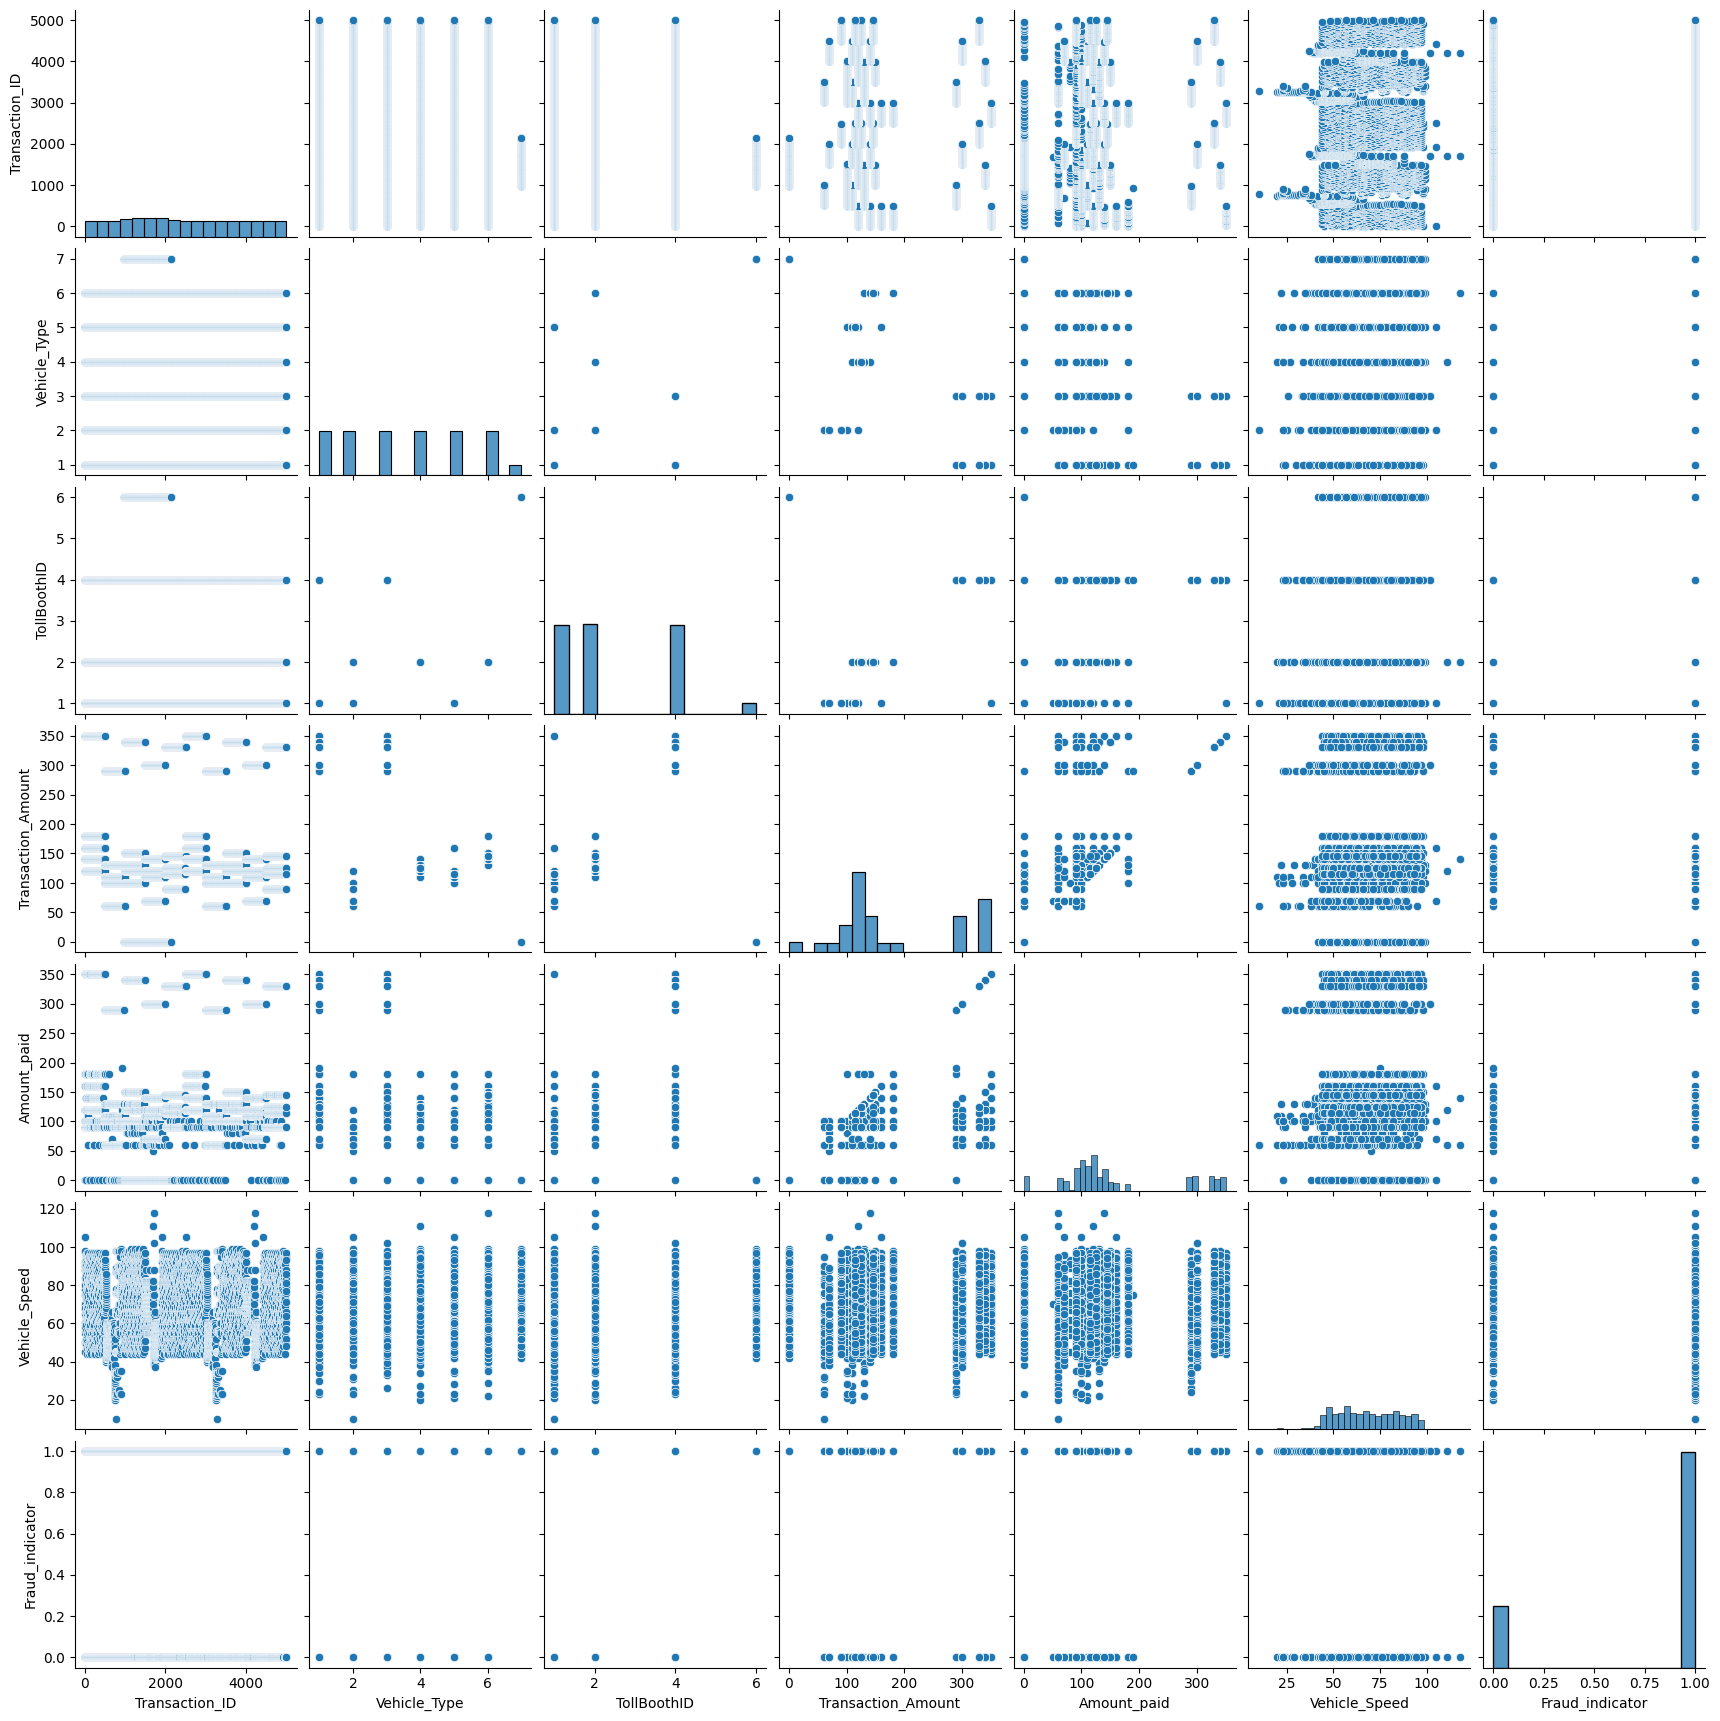

['Large' 'Small' 'Medium']


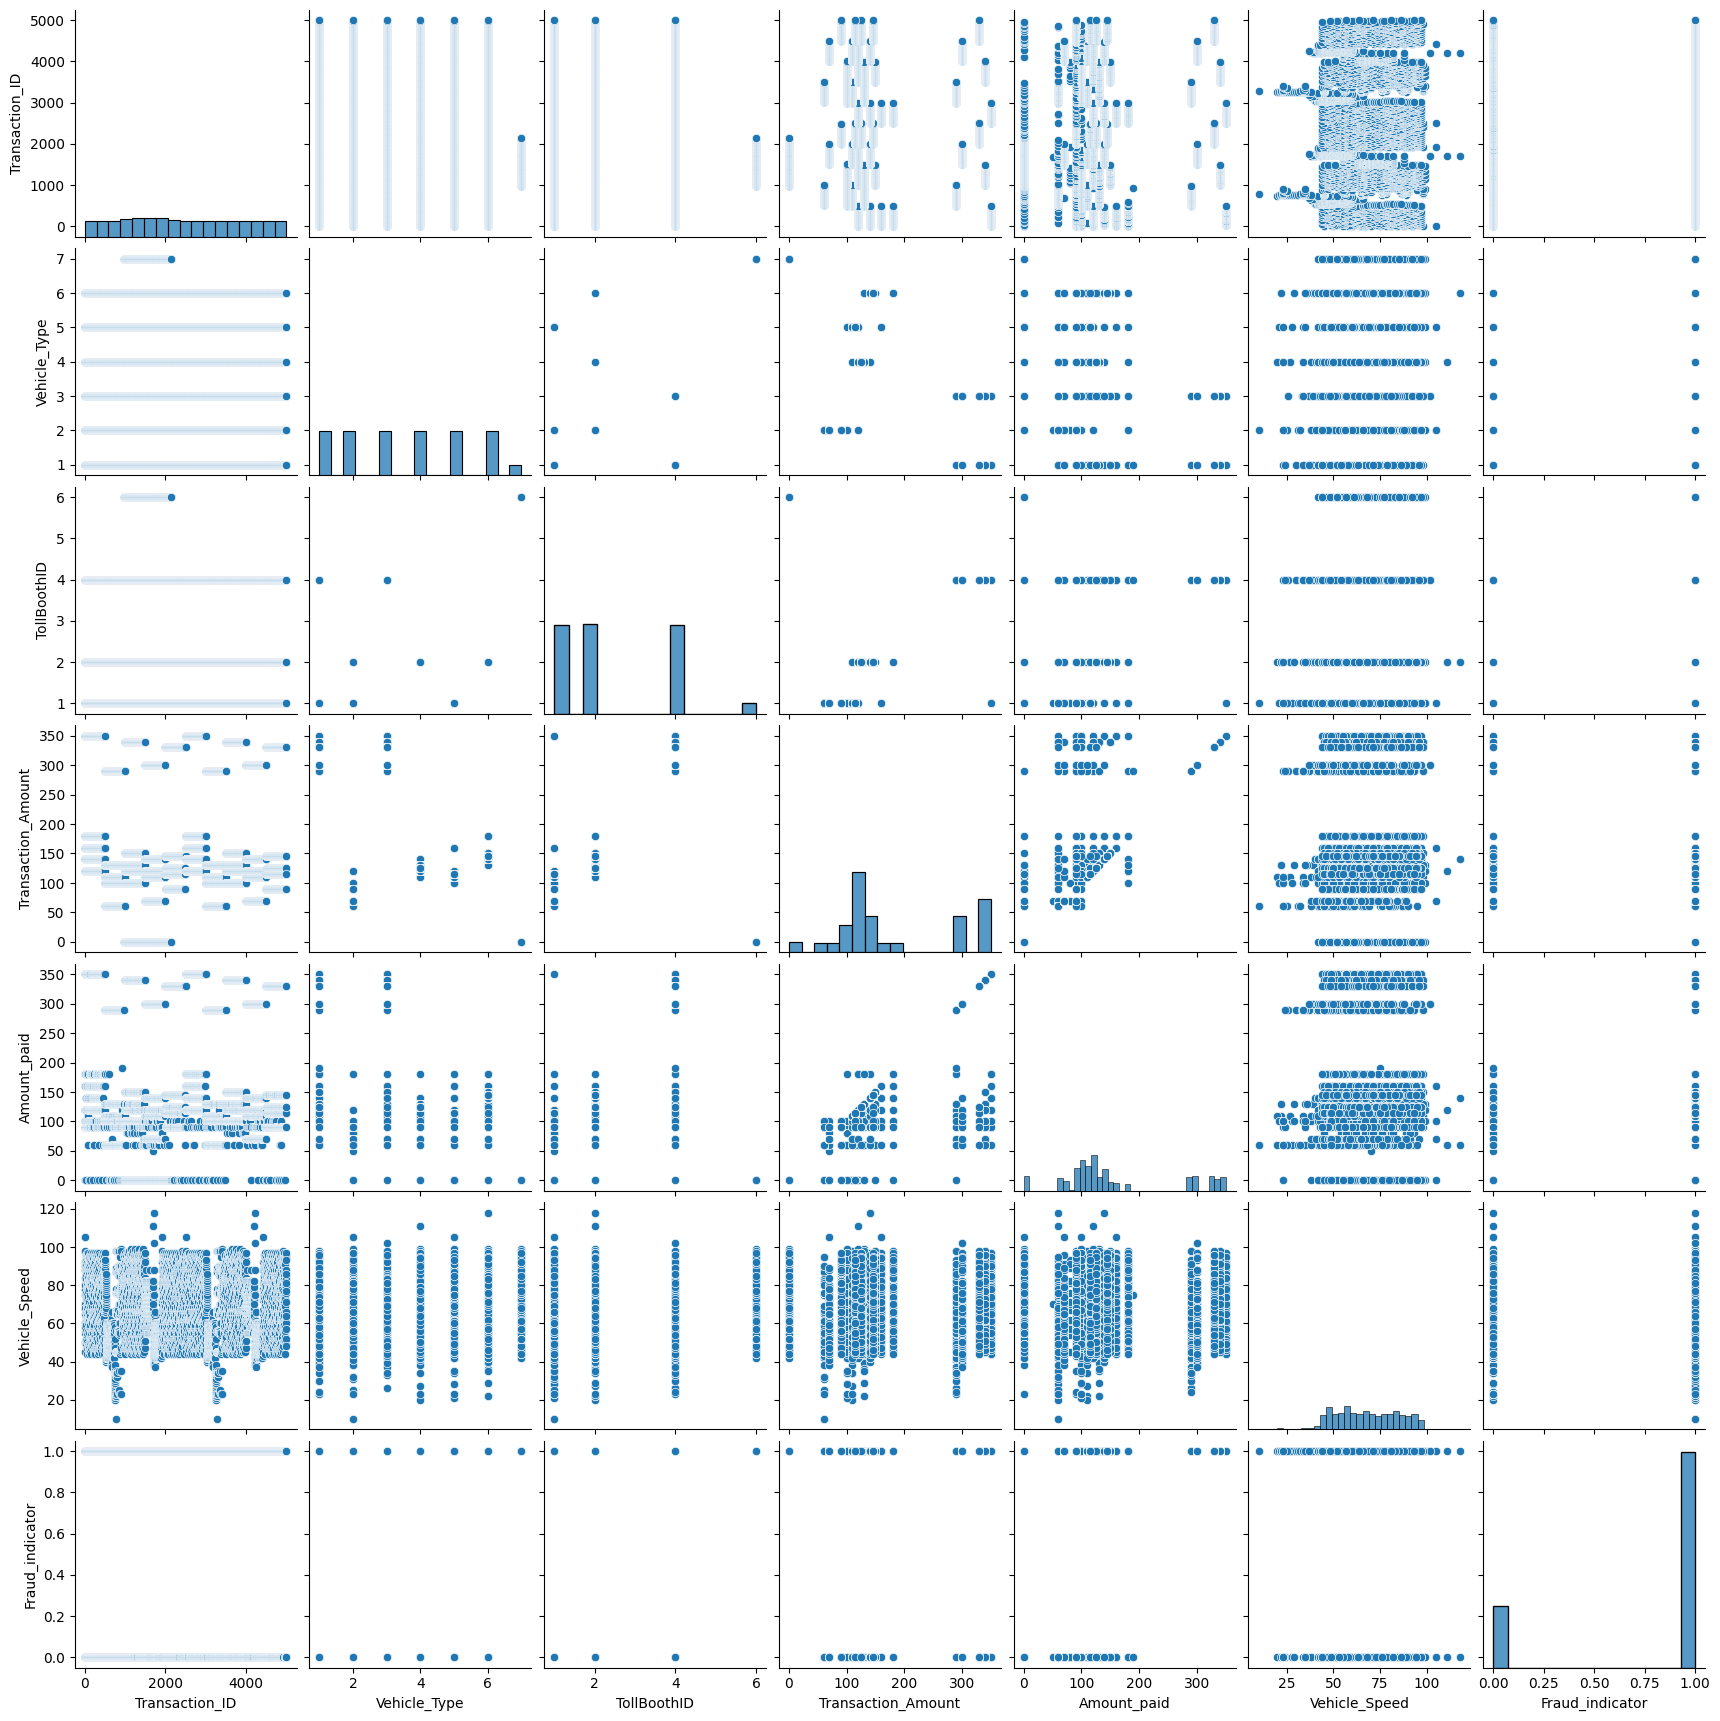

['13.059816123454882, 77.77068662374292'
 '13.042660878688794, 77.47580097259879'
 '12.84197701525119, 77.67547528176169'
 '12.936687032945434, 77.53113977439017'
 '13.21331620748757, 77.55413526894684']


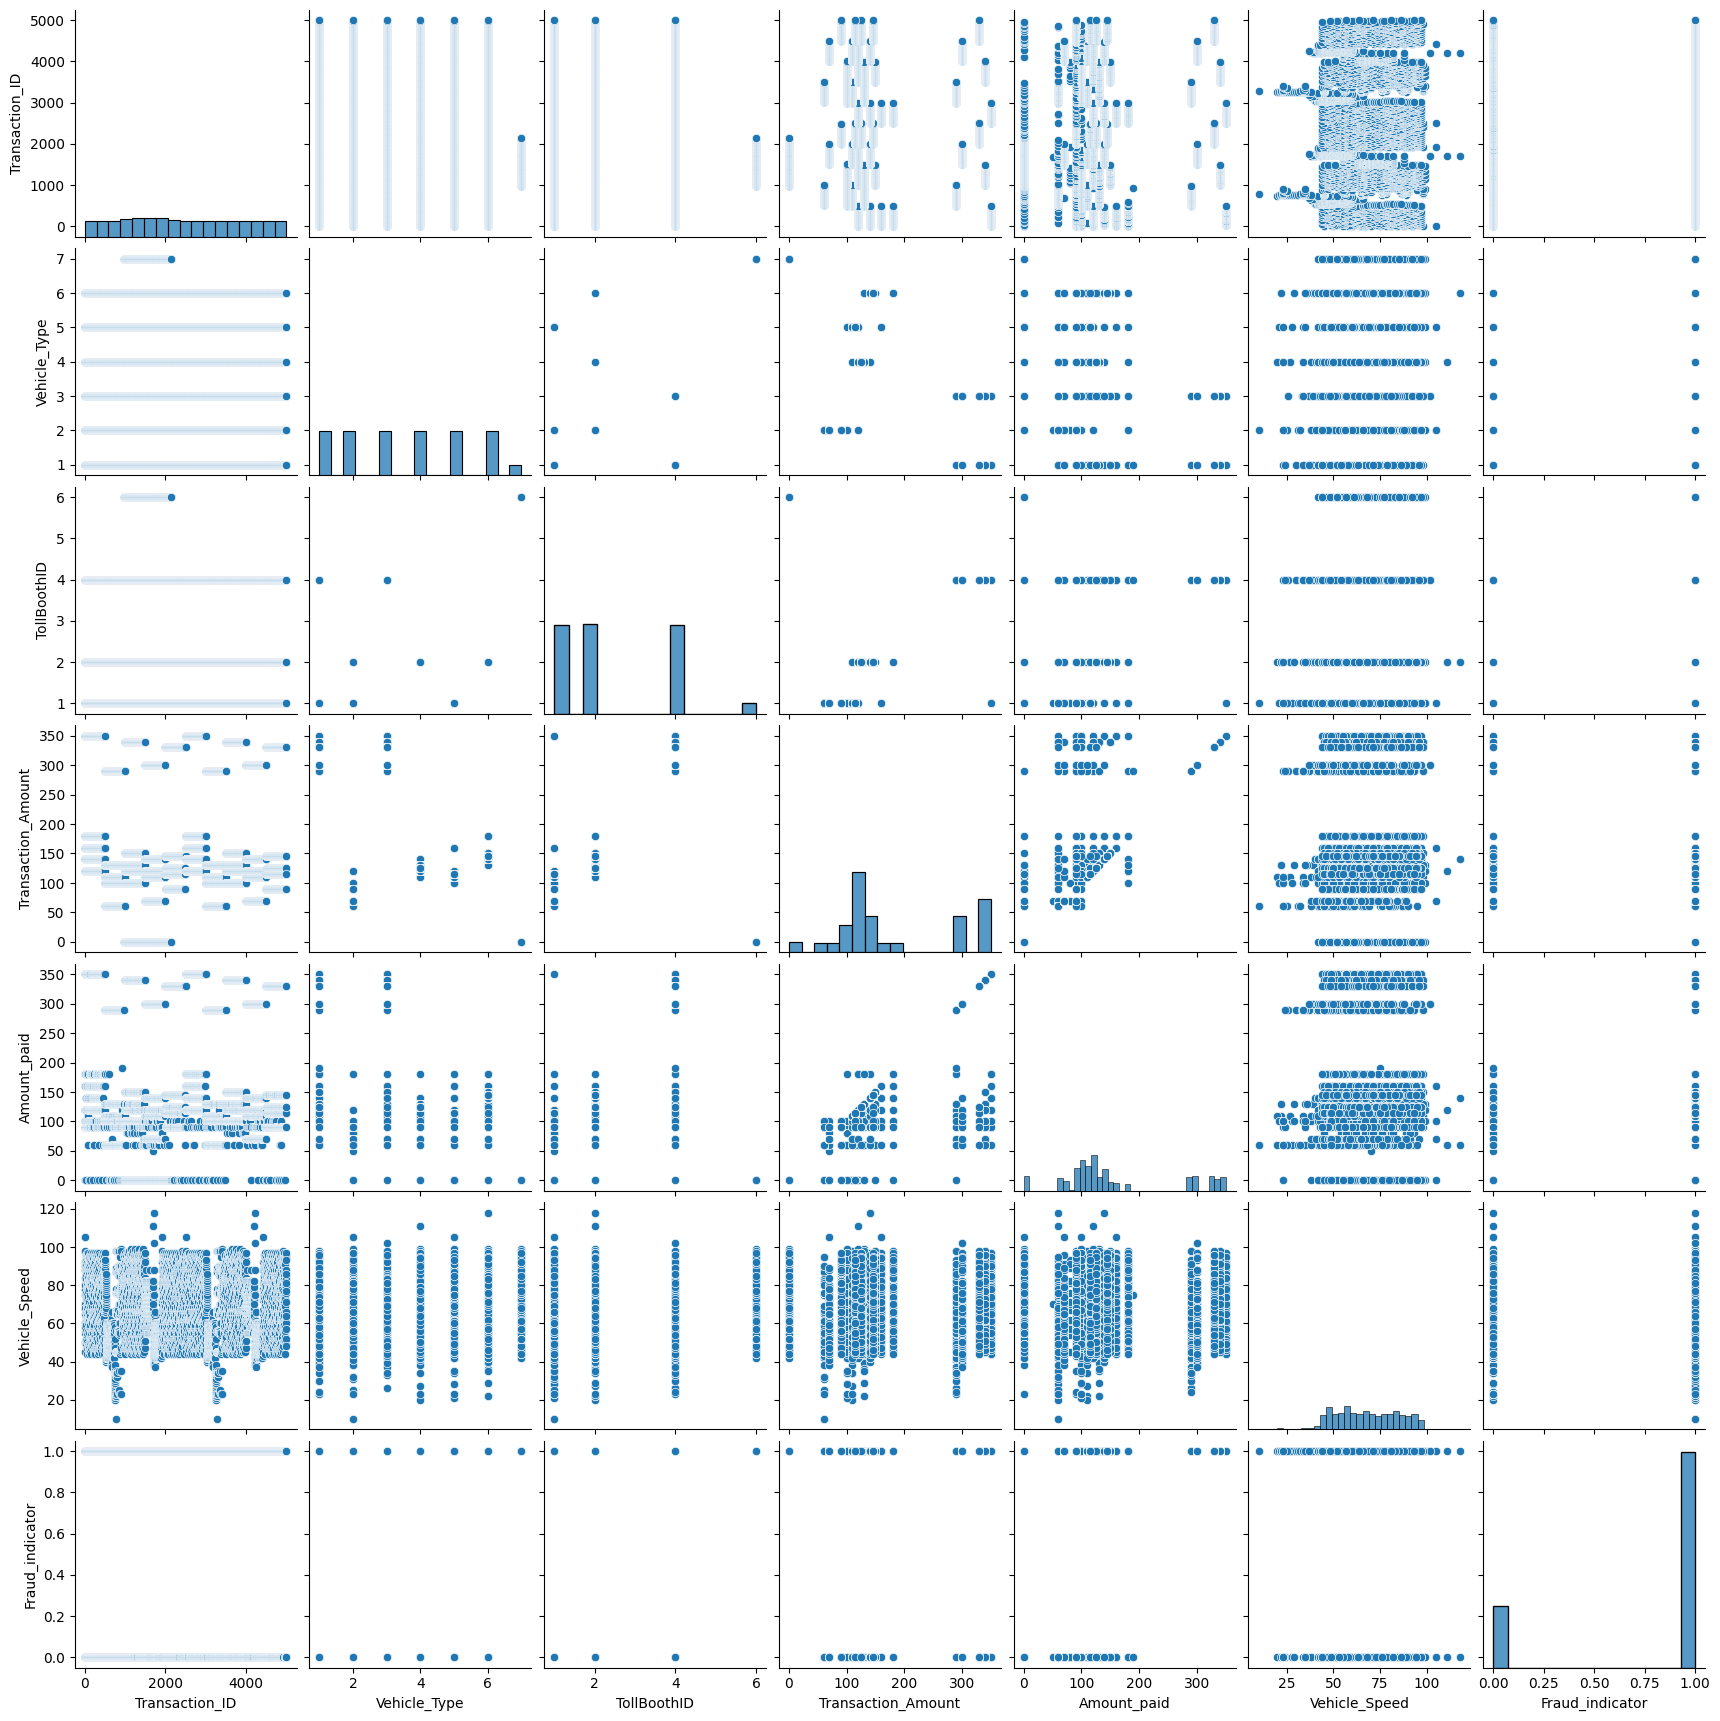

['KA11AB1234' 'KA66CD5678' 'KA11GH3456' ... 'KA33WX6789' 'KA35YZ0123'
 'KA37AB3456']


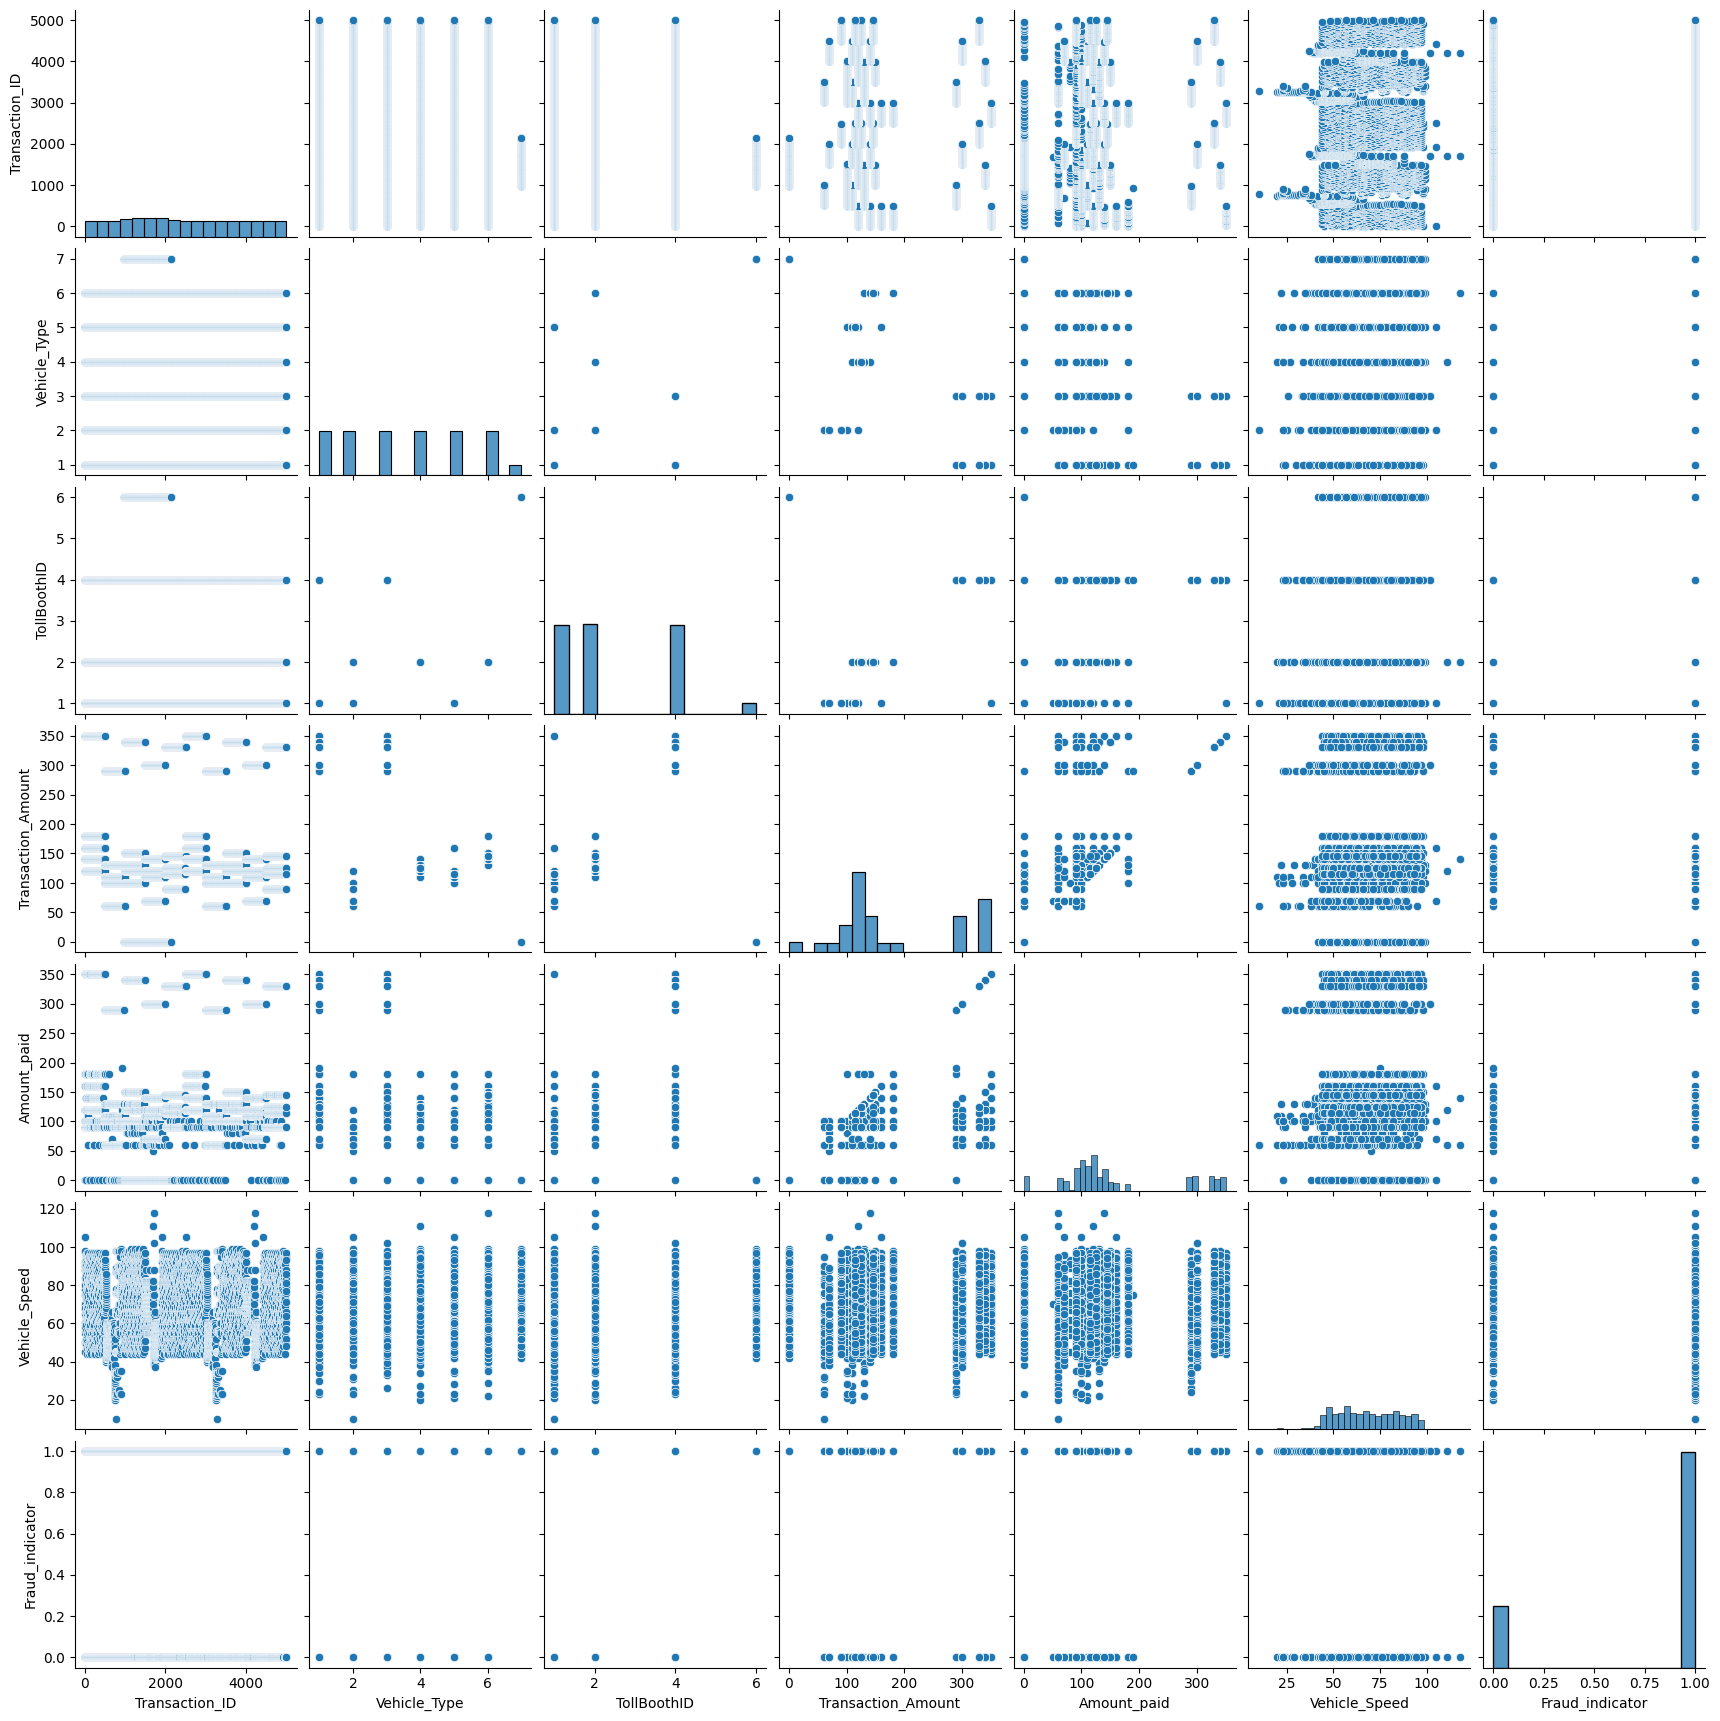

In [25]:
for col in fast_tag.select_dtypes(include = 'object').columns:
    print(f"{fast_tag[col].unique()}")
    sns.pairplot(fast_tag)
    plt.show()

# MODEL DEVELOPMENT

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [31]:
x = fast_tag.drop('Fraud_indicator', axis=1)
y = fast_tag['Fraud_indicator']


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
clf = RandomForestClassifier()

In [34]:
clf.fit(x_train, y_train)

ValueError: could not convert string to float: '3/15/2023 3:01'

In [35]:
y_pred = clf.predict(x_test)

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

In [36]:
accuracy = accuracy_score(y_test, y_pred)

NameError: name 'y_pred' is not defined

In [37]:
accuracy_percentage = accuracy * 100

NameError: name 'accuracy' is not defined

In [38]:
print(f"Accuracy: {accuracy_percentage:.2f}%")

NameError: name 'accuracy_percentage' is not defined

In [ ]:
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print(f"Accuracy: {accuracy_percentage:.2f}%")